In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

train = pd.read_csv('./hr_data/aug_train.csv')
test = pd.read_csv('./hr_data/aug_test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [2]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
train[['city','city_development_index']]

,city,city_development_index
0,city_103,0.920
1,city_40,0.776
2,city_21,0.624
3,city_115,0.789
4,city_162,0.767
...,...,...
19153,city_173,0.878
19154,city_103,0.920
19155,city_103,0.920
19156,city_65,0.802


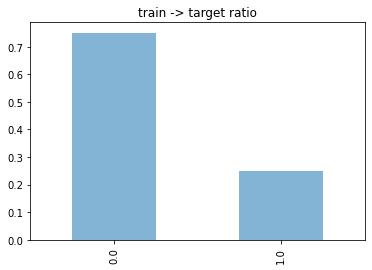

In [32]:
train['target'].value_counts(normalize = True).plot(kind = 'bar', alpha = 0.55)
plt.title('train -> target ratio')
plt.show()

# 클래스 불균형이 있네

In [38]:
print(train[train['gender'].isnull()]['target'].value_counts(normalize = True))
print('\n')
print(train.groupby(['gender'])['target'].count())
# gender별로 크게 차이는 없고 Gender에 other이 있는데 동성애인인가? 일단 target에 크게 영향을 미치지는 않고 train전체의 분포와 비슷하게 감

0.0    0.691881
1.0    0.308119
Name: target, dtype: float64


gender
Female     1238
Male      13221
Other       191
Name: target, dtype: int64


In [41]:
train.groupby(['relevent_experience'])['target'].value_counts(normalize = True)

# 여기서는 차이가 좀 있네 경험을 가진 사람이 target이 0일 확률이 높음

relevent_experience      target
Has relevent experience  0.0       0.785310
                         1.0       0.214690
No relevent experience   0.0       0.661573
                         1.0       0.338427
Name: target, dtype: float64

In [49]:
train.groupby(['enrolled_university'])['target'].value_counts(normalize = True)
# full time course가 target이 1에 할당될 확률이 더 높아보인다

enrolled_university  target
Full time course     0.0       0.619111
                     1.0       0.380889
Part time course     0.0       0.747913
                     1.0       0.252087
no_enrollment        0.0       0.788594
                     1.0       0.211406
Name: target, dtype: float64

In [51]:
train[train['enrolled_university'].isnull()]['target'].value_counts(normalize = True)

0.0    0.681347
1.0    0.318653
Name: target, dtype: float64

In [58]:
print(train.groupby(['education_level'])['target'].value_counts(normalize = True))
print('\n')
print(train[train['education_level'].isnull()]['target'].value_counts(normalize = True))
# 약간 유의미한듯?

education_level  target
Graduate         0.0       0.720210
                 1.0       0.279790
High School      0.0       0.804660
                 1.0       0.195340
Masters          0.0       0.785600
                 1.0       0.214400
Phd              0.0       0.859903
                 1.0       0.140097
Primary School   0.0       0.866883
                 1.0       0.133117
Name: target, dtype: float64


0.0    0.773913
1.0    0.226087
Name: target, dtype: float64


In [64]:
train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [68]:
train[train['experience'].isnull()].groupby(['relevent_experience'])['target'].value_counts(normalize = True)

relevent_experience      target
Has relevent experience  0.0       0.636364
                         1.0       0.363636
No relevent experience   0.0       0.666667
                         1.0       0.333333
Name: target, dtype: float64

In [50]:
from sklearn.preprocessing import LabelEncoder


encoder_label = ['gender', 'enrolled_university', 'education_level']

for i in encoder_label:
    train[i].fillna(-1)
    test[i].fillna(-1)
    
    le = LabelEncoder()
    le.fit(train[i])
    le.transform(train[i])
    le.transform(test[i])

Help on LabelEncoder in module sklearn.preprocessing._label object:

class LabelEncoder(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  Encode target labels with value between 0 and n_classes-1.
 |  
 |  This transformer should be used to encode target values, *i.e.* `y`, and
 |  not the input `X`.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_targets>`.
 |  
 |  .. versionadded:: 0.12
 |  
 |  Attributes
 |  ----------
 |  classes_ : ndarray of shape (n_classes,)
 |      Holds the label for each class.
 |  
 |  See Also
 |  --------
 |  OrdinalEncoder : Encode categorical features using an ordinal encoding
 |      scheme.
 |  OneHotEncoder : Encode categorical features as a one-hot numeric array.
 |  
 |  Examples
 |  --------
 |  `LabelEncoder` can be used to normalize labels.
 |  
 |  >>> from sklearn import preprocessing
 |  >>> le = preprocessing.LabelEncoder()
 |  >>> le.fit([1, 2, 2, 6])
 |  LabelEncoder()
 |  >>> le.classes_
 |  array([1, 2, 6])
 |  >

In [52]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64